In [1]:
from utils import *
import numpy as np
import pickle


1 Physical GPUs, 1 Logical GPUs


# data for train

In [2]:
# data_frame_paths = ['five_min_2013_2018.csv']
data_frame_paths = ['anal_train.csv']

# data for test

In [ ]:
data_frame_paths = ['five_min_2018_2022.csv']

In [ ]:
# data_frame_paths = ['anal_train.csv', ]

# data_frame_paths = ['train_stat_1h.csv', ]
# data_frame_paths = ['../dataset_1h.csv']

# data_frame_paths = ['train_last_year_stat_5min.csv']
# data_frame_paths = ['test_last_year_stat_5min.csv']
# data_frame_paths = ['test_stat_5min.csv', ]
# data_frame_paths = ['../dataset_5min.csv']

handle = DataHandler(data_frame_paths[0], kbins=4, encode='ordinal', strategy='quantile',
                            window_size=WINDOW_SIZE,
                            smooth_shift_size=SMOOTH_SHIFT_SIZE, smooth_window_size=SMOOTH_WINDOW_SIZE,
                            discretizer='discretizer1', purpose_colname='close_pct_change_3_smoother_3',
                            smooth_make_loss_profit_equal=True,
                            prediction_mode=PREDICTION_MODE, add_zig_zag_indicators=True, pct_change_on_all=True,
                            pct_and_not_pct_together=False,
                            load_from_saved_dataFrame=False, multi_level_res=True,
                            number_of_class=NUMBER_OF_OUTPUT_CLASSES,
                            add_zigzag_subwave=ADD_ZIGZAG_SUBWAVE, multi_level_intervals=MULTI_LEVEL_INTERVALS,
                            zig_zag_mode=ZIG_ZAG_MODE, zigzag_based_learning=ZIGZAG_BASED_LEARNING,
                            spread_base_learning=SPREAD_BASE_LEARNING,
                            back_for_base_learning=BACK_FOR_BASE_LEARNING,
                            back_zigzag_base_learning=BACK_ZIGZAG_BASE_LEARNING, pivot_mode=PIVOTE_MODE,
                            include_pivots_data=INCLUDE_PIVOTS_DATA,
                            inclue_and_update_pivots_data=INCLUDE_AND_UPDATE_PIVOTS_DATA,
                            open_close_1d_base_learning=OPEN_CLOSE_1D_BASE_LEARNING,
                            open_close_2d_base_learning=OPEN_CLOSE_2D_BASE_LEARNING,
                            number_of_future=NUMBER_OF_FUTURE_IN_MULTIPILE_FUTURE,
                            multi_future=MULTIPLE_FUTURE_BASE_LEARNING,
                            open_close_1d_base_learning_lin=OPEN_CLOSE_1D_BASE_LEARNING_LIN,
                            bucket_base_check_list=WAVE_LIST_TO_CHECK_BUCKET_BASE,
                            filter_col=False,
                            filter_cols_names=COMPLETE_ZIGZAG_FEATURE_NAMES,
                            post_processor=RemoveCodePostProcessor)
couples = load_ds_mode_from_json()[0]
# seperate zigzag culumns from data (feature has been computed)
columns = list(filter(lambda x: 'zigzag_price' in x, handle.final_dataframe.columns))


In [4]:
handle.final_dataframe

high       low      open     close  \
time                                                          
2003-05-05 00:00:00  0.000000  0.000000  0.000000  0.000000   
2003-05-05 04:00:00 -0.001905 -0.000035 -0.000370  0.000811   
2003-05-05 08:00:00  0.002314 -0.000423 -0.001095  0.002712   
2003-05-05 12:00:00  0.002200  0.001817  0.002874  0.000480   
2003-05-05 16:00:00  0.001293  0.002785  0.001448  0.001030   
...                       ...       ...       ...       ...   
2017-08-17 00:00:00  0.004063  0.000828  0.001013  0.003367   
2017-08-17 04:00:00  0.000571  0.002791  0.003313  0.000854   
2017-08-17 08:00:00 -0.000958 -0.002496  0.000908 -0.001884   
2017-08-17 12:00:00  0.000551 -0.001170 -0.001939 -0.000621   
2017-08-17 16:00:00 -0.000274  0.002270 -0.000568  0.002746   

                     high_pct_change_1_smoother_3  \
time                                                
2003-05-05 00:00:00                      0.000000   
2003-05-05 04:00:00                      0.000000   
2003-05-05 08:00:00                      0.000135   
2003-05-05 12:00:00                      0.000868   
2003-05-05 16:00:00                      0.001936   
...                                           ...   
2017-08-17 00:00:00                      0.003928   
2017-08-17 04:00:00                      0.001639   
2017-08-17 08:00:00                      0.001225   
2017-08-17 12:00:00                      0.000054   
2017-08-17 16:00:00                     -0.000227   

                     low_pct_change_1_smoother_3  \
time                                               
2003-05-05 00:00:00                     0.000000   
2003-05-05 04:00:00                     0.000000   
2003-05-05 08:00:00                    -0.000153   
2003-05-05 12:00:00                     0.000453   
2003-05-05 16:00:00                     0.001393   
...                                          ...   
2017-08-17 00:00:00                     0.003919   
2017-08-17 04:00:00                     0.003830   
2017-08-17 08:00:00                     0.000373   
2017-08-17 12:00:00                    -0.000294   
2017-08-17 16:00:00                    -0.000468   

                     open_pct_change_1_smoother_3  \
time                                                
2003-05-05 00:00:00                      0.000000   
2003-05-05 04:00:00                      0.000000   
2003-05-05 08:00:00                     -0.000489   
2003-05-05 12:00:00                      0.000469   
2003-05-05 16:00:00                      0.001075   
...                                           ...   
2017-08-17 00:00:00                      0.003173   
2017-08-17 04:00:00                      0.003527   
2017-08-17 08:00:00                      0.001745   
2017-08-17 12:00:00                      0.000759   
2017-08-17 16:00:00                     -0.000535   

                     close_pct_change_1_smoother_3  \
time                                                 
2003-05-05 00:00:00                       0.000000   
2003-05-05 04:00:00                       0.000000   
2003-05-05 08:00:00                       0.001174   
2003-05-05 12:00:00                       0.001334   
2003-05-05 16:00:00                       0.001407   
...                                            ...   
2017-08-17 00:00:00                       0.003545   
2017-08-17 04:00:00                       0.001742   
2017-08-17 08:00:00                       0.000778   
2017-08-17 12:00:00                      -0.000552   
2017-08-17 16:00:00                       0.000079   

                     high_pct_change_3_smoother_3  \
time                                                
2003-05-05 00:00:00                      0.000000   
2003-05-05 04:00:00                      0.000000   
2003-05-05 08:00:00                      0.000000   
2003-05-05 12:00:00                      0.000868   
2003-05-05 16:00:00                      0.002808   
...                                           ...   
2017-08-17 00:00:00  

# basic statistics computation

In [5]:
ComputeHistData().compute(handle.final_dataframe[columns].values, 'price', columns)

100%|██████████| 106/106 [00:01<00:00, 76.94it/s]


# structure base statistics computation

In [5]:
spliter = FilterOnHistData.both_base_pair_sorter
# spliter = FilterOnHistData.structure_base_pair_sorter
# spliter = FilterOnHistData.ratio_base_pair_sorter
# spliter = FilterOnHistData.temp_pair_sorter

StructureBaseComputeHistData().compute(handle.final_dataframe[columns].values, 'price', columns,
                                       handle.zigzag_analizer.list_of_tss, handle.close_.values,
                                       spliter)

KeyboardInterrupt: 

# basic filtering

100%|██████████| 350000/350000 [00:02<00:00, 136996.67it/s]


('01234', [0, 0, 1])
('02341', [0, 0, 73])
('23041', [0, 0, 410])
('20341', [0, 0, 428])
('31042', [492, 895, 2821])
('24013', [318, 1370, 3769])
('20431', [1037, 819, 4400])
('13402', [1261, 701, 4433])
('31024', [820, 1540, 4749])
('40213', [1102, 1780, 6892])
('42013', [1175, 2683, 7570])
('13420', [1918, 1901, 7588])
('24301', [3299, 2382, 7695])
('02431', [1925, 1865, 7770])
('10342', [3689, 2014, 8259])
('20143', [2591, 2372, 8627])
('13204', [1107, 2762, 8666])
('34102', [2406, 2933, 9443])
('04213', [1799, 3410, 9791])
('40231', [1451, 3132, 10167])
('31204', [1242, 3469, 10372])
('13240', [2217, 3108, 10776])
('31240', [2120, 3301, 11377])
('13042', [2914, 3111, 11701])
('31402', [2625, 3005, 11754])
('42301', [2890, 3942, 11870])
('04231', [2812, 3631, 12738])
('10324', [2792, 5330, 12789])
('20413', [2538, 3495, 13386])
('24031', [3093, 4534, 14238])
('34120', [3567, 3584, 15314])
('02143', [3126, 4070, 16618])
('42031', [2945, 5073, 17784])
('13024', [2651, 6517, 19393])
('

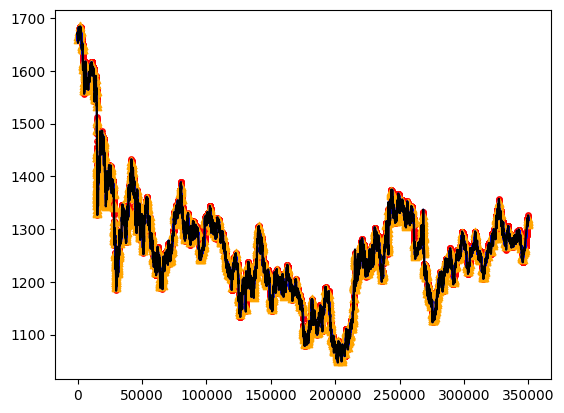

C:\Users\Asus\AppData\Local\Temp\ipykernel_9896\73924924.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pivot_filters.append(pivot_filter.astype(np.bool))


32291


100%|██████████| 350000/350000 [00:02<00:00, 156374.35it/s]


('01234', [0, 0, 1])
('02341', [0, 0, 73])
('23041', [0, 0, 410])
('20341', [0, 0, 428])
('31042', [62, 638, 2821])
('24013', [121, 1142, 3769])
('20431', [571, 379, 4400])
('13402', [135, 154, 4433])
('31024', [1, 1090, 4749])
('40213', [4, 1466, 6892])
('42013', [35, 1908, 7570])
('13420', [766, 777, 7588])
('24301', [390, 472, 7695])
('02431', [708, 715, 7770])
('10342', [288, 542, 8259])
('20143', [401, 815, 8627])
('13204', [197, 2057, 8666])
('34102', [629, 1356, 9443])
('04213', [238, 2754, 9791])
('40231', [43, 1581, 10167])
('31204', [16, 2647, 10372])
('13240', [692, 1429, 10776])
('31240', [440, 1845, 11377])
('13042', [575, 788, 11701])
('31402', [980, 1366, 11754])
('42301', [291, 742, 11870])
('04231', [1057, 1757, 12738])
('10324', [205, 846, 12789])
('20413', [889, 1320, 13386])
('24031', [885, 1690, 14238])
('34120', [666, 1377, 15314])
('02143', [636, 2033, 16618])
('42031', [328, 1959, 17784])
('13024', [57, 2688, 19393])
('02413', [1114, 3414, 22324])
('31420', [186

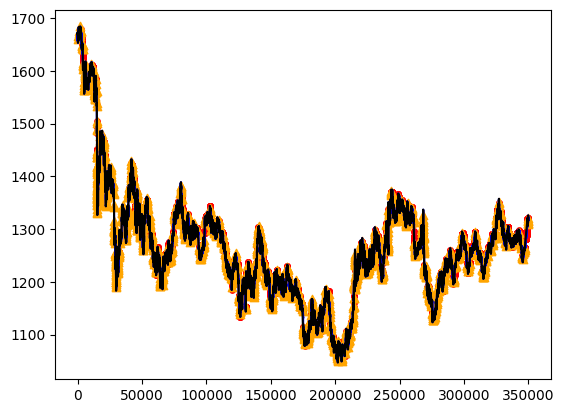

32291


C:\Users\Asus\AppData\Local\Temp\ipykernel_9896\73924924.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pivot_filters.append(pivot_filter.astype(np.bool))


In [7]:
# pivot_filter is a numpy array with shape of number of data rows. every 0 means this function has no oppinion about that row and every 1 means that row can not been happen
pivot_filters = []
for i, item in enumerate(handle.bucket_base_check_list):
    pivot_filter = FilterOnHistData().compute(handle.final_dataframe[columns].values, 'price', [item],
                                              handle.zigzag_analizer.list_of_true_ratios_idxs if item==4 else None)
    # statistics on accuracy of each structure in order of 1-number of fault 2-number of true and 3-number of structure happening
    # (false, true, structure count) --> (2, 5, 100) -> 2 times wrong predict, 5 times true predict and 100 times this structure happend
    FilterOnHistData.structure_base_analysis_candle_base(handle.close_, handle.zigzag_analizer.list_of_tss,
                                                         pivot_filter, np.where(handle.final_pivots != 0)[0],
                                                         sorter=FilterOnHistData.structure_base_pair_sorter)
    # train section and test section and all section that will be printed is calculated by this function
    FilterOnHistData.overall_statistic_calculation(np.where(handle.final_pivots != 0)[0], pivot_filter,
                                                   first_reversed_point=handle.zigzag_analizer.first_reversed_point,
                                                   all_pivots=handle.zigzag_analizer.list_of_tss)
    # plot zigzag and first reverse point and predicted point
    FilterOnHistData.plot(handle.close_, np.where(handle.final_pivots != 0)[0], pivot_filter,
                          handle.zigzag_analizer.first_reversed_point)
    pivot_filters.append(pivot_filter.astype(np.bool))
    print(len(handle.zigzag_analizer.list_of_true_ratios_idxs))

# structure only

In [ ]:
pivot_filters = []
for i, item in enumerate(handle.bucket_base_check_list):
    # pivot_filter = FilterOnHistData().compute(self.dataframe[columns].values, 'price', [item],
    #                                        self.zigzag_analizer.list_of_true_ratios_idxs if item==4 else None)
    pivot_filter = StructureBaseFilterOnHistData().compute(handle.final_dataframe[columns].values,
                                                           handle.zigzag_analizer.list_of_tss,
                                                           handle.close_.values,
                                                           FilterOnHistData.structure_base_pair_sorter,
                                                           'price', [item],
                                                           handle.zigzag_analizer.list_of_true_ratios_idxs
                                                                        if item == 4 else None)
    FilterOnHistData.structure_base_analysis_candle_base(handle.close_, handle.zigzag_analizer.list_of_tss,
                                                         pivot_filter, np.where(handle.final_pivots != 0)[0],
                                                         sorter=FilterOnHistData.structure_base_pair_sorter)
    FilterOnHistData.overall_statistic_calculation(np.where(handle.final_pivots != 0)[0], pivot_filter,
                                                   first_reversed_point=handle.zigzag_analizer.first_reversed_point,
                                                   all_pivots=handle.zigzag_analizer.list_of_tss)
    FilterOnHistData.plot(handle.close_, np.where(handle.final_pivots != 0)[0], pivot_filter,
                          handle.zigzag_analizer.first_reversed_point)
    pivot_filters.append(pivot_filter.astype(np.bool))
    print(len(handle.zigzag_analizer.list_of_true_ratios_idxs))


# ratio only

In [ ]:
pivot_filters = []
for i, item in enumerate(handle.bucket_base_check_list):
    # pivot_filter = FilterOnHistData().compute(self.dataframe[columns].values, 'price', [item],
    #                                        self.zigzag_analizer.list_of_true_ratios_idxs if item==4 else None)
    pivot_filter = StructureBaseFilterOnHistData().compute(handle.final_dataframe[columns].values,
                                                           handle.zigzag_analizer.list_of_tss,
                                                           handle.close_.values,
                                                           FilterOnHistData.ratio_base_pair_sorter,
                                                           'price', [item],
                                                           handle.zigzag_analizer.list_of_true_ratios_idxs
                                                                        if item == 4 else None)
    FilterOnHistData.structure_base_analysis_candle_base(handle.close_, handle.zigzag_analizer.list_of_tss,
                                                         pivot_filter, np.where(handle.final_pivots != 0)[0],
                                                         sorter=FilterOnHistData.ratio_base_pair_sorter)
    FilterOnHistData.overall_statistic_calculation(np.where(handle.final_pivots != 0)[0], pivot_filter,
                                                   first_reversed_point=handle.zigzag_analizer.first_reversed_point,
                                                   all_pivots=handle.zigzag_analizer.list_of_tss)
    FilterOnHistData.plot(handle.close_, np.where(handle.final_pivots != 0)[0], pivot_filter,
                          handle.zigzag_analizer.first_reversed_point)
    pivot_filters.append(pivot_filter.astype(np.bool))
    print(len(handle.zigzag_analizer.list_of_true_ratios_idxs))

# ration and structure together

In [ ]:
pivot_filters = []
for i, item in enumerate(handle.bucket_base_check_list):
    # pivot_filter = FilterOnHistData().compute(self.dataframe[columns].values, 'price', [item],
    #                                        self.zigzag_analizer.list_of_true_ratios_idxs if item==4 else None)
    pivot_filter = StructureBaseFilterOnHistData().compute(handle.final_dataframe[columns].values,
                                                           handle.zigzag_analizer.list_of_tss,
                                                           handle.close_.values,
                                                           FilterOnHistData.both_base_pair_sorter,
                                                           'price', [item],
                                                           handle.zigzag_analizer.list_of_true_ratios_idxs
                                                                        if item == 4 else None)
    FilterOnHistData.structure_base_analysis_candle_base(handle.close_, handle.zigzag_analizer.list_of_tss,
                                                         pivot_filter, np.where(handle.final_pivots != 0)[0],
                                                         sorter=FilterOnHistData.both_base_pair_sorter)
    FilterOnHistData.overall_statistic_calculation(np.where(handle.final_pivots != 0)[0], pivot_filter,
                                                   first_reversed_point=handle.zigzag_analizer.first_reversed_point,
                                                   all_pivots=handle.zigzag_analizer.list_of_tss)
    FilterOnHistData.plot(handle.close_, np.where(handle.final_pivots != 0)[0], pivot_filter,
                          handle.zigzag_analizer.first_reversed_point)
    pivot_filters.append(pivot_filter.astype(np.bool))
    print(len(handle.zigzag_analizer.list_of_true_ratios_idxs))

In [21]:
pivot_filters = []
for i, item in enumerate(handle.bucket_base_check_list):
    # pivot_filter = FilterOnHistData().compute(self.dataframe[columns].values, 'price', [item],
    #                                        self.zigzag_analizer.list_of_true_ratios_idxs if item==4 else None)
    pivot_filter = StructureBaseFilterOnHistData().compute(handle.final_dataframe[columns].values,
                                                           handle.zigzag_analizer.list_of_tss,
                                                           handle.close_.values,
                                                           FilterOnHistData.temp_pair_sorter,
                                                           'price', [item],
                                                           handle.zigzag_analizer.list_of_true_ratios_idxs
                                                                        if item == 4 else None)
    FilterOnHistData.structure_base_analysis_candle_base(handle.close_, handle.zigzag_analizer.list_of_tss,
                                                         pivot_filter, np.where(handle.final_pivots != 0)[0],
                                                         sorter=FilterOnHistData.temp_pair_sorter)
    FilterOnHistData.overall_statistic_calculation(np.where(handle.final_pivots != 0)[0], pivot_filter,
                                                   first_reversed_point=handle.zigzag_analizer.first_reversed_point,
                                                   all_pivots=handle.zigzag_analizer.list_of_tss)
    FilterOnHistData.plot(handle.close_, np.where(handle.final_pivots != 0)[0], pivot_filter,
                          handle.zigzag_analizer.first_reversed_point)
    pivot_filters.append(pivot_filter.astype(np.bool))
    print(len(handle.zigzag_analizer.list_of_true_ratios_idxs))

NameError: name 'exit' is not defined

In [18]:
# %load_ext autoreload
%autoreload 2
# import importlib
# importlib.reload(utils)

In [19]:
# %load_ext autoreload
%aimport



Modules to reload:
all-except-skipped

Modules to skip:

